In [450]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [451]:
matrix = np.random.randint(low=3, high=99, size=(10, 6))

In [452]:
print(matrix)

[[42 32 82 84 92 33]
 [37 76 47 52  4 64]
 [34 61 56 30 92 16]
 [92 10 93 67 90 92]
 [54 64 11 62 70 91]
 [41  3 14 39 79 34]
 [16 19 22 54 54 63]
 [79 94 15 42 17 12]
 [62 55 95 67 86 56]
 [96 90 29 19 56  5]]


In [453]:
def closest_number(z, A):
    result = None
    for array in A:
        index = (np.abs(array - z)).argmin()
        if result is None or abs(array[index] - z) < abs(result - z):
            result = array[index]
    return result

In [454]:
print(closest_number(50, matrix))

52


In [455]:
average = np.average(matrix)
median = np.median(matrix)

In [456]:
print(f'Average: {average}' + f'\nMedian: {median}')

Average: 52.38333333333333
Median: 54.5


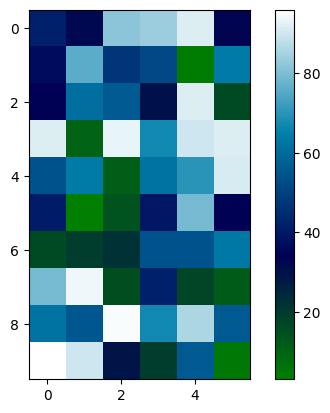

In [457]:
plt.imshow(matrix, cmap='ocean')
plt.colorbar()
plt.show()

In [458]:
prop = int(matrix.size * 0.2)
x = [random.choice(range(matrix.shape[0])) for _ in range(prop)]
y = [random.choice(range(matrix.shape[1])) for _ in range(prop)]
matrix = matrix.astype(float)
matrix[x,y] = np.NaN

In [459]:
print(matrix)

[[42. 32. 82. nan 92. 33.]
 [37. 76. 47. 52.  4. 64.]
 [34. 61. 56. 30. nan 16.]
 [92. 10. nan 67. 90. 92.]
 [54. 64. 11. nan 70. 91.]
 [41.  3. nan 39. 79. nan]
 [16. 19. 22. 54. 54. 63.]
 [79. 94. 15. 42. nan nan]
 [62. nan 95. 67. 86. 56.]
 [96. 90. 29. 19. 56. nan]]


In [460]:
for array in matrix:
    array[np.isnan(array)] = np.nanmean(array)

In [461]:
print(matrix)

[[42.  32.  82.  56.2 92.  33. ]
 [37.  76.  47.  52.   4.  64. ]
 [34.  61.  56.  30.  39.4 16. ]
 [92.  10.  70.2 67.  90.  92. ]
 [54.  64.  11.  58.  70.  91. ]
 [41.   3.  40.5 39.  79.  40.5]
 [16.  19.  22.  54.  54.  63. ]
 [79.  94.  15.  42.  57.5 57.5]
 [62.  73.2 95.  67.  86.  56. ]
 [96.  90.  29.  19.  56.  58. ]]


In [462]:
norm = np.linalg.norm(matrix)
matrix = matrix/norm

In [463]:
print(matrix)

[[0.09102151 0.06934972 0.17770866 0.12179545 0.19938045 0.0715169 ]
 [0.08018562 0.16470559 0.1018574  0.1126933  0.00866872 0.13869944]
 [0.07368408 0.13219791 0.12136201 0.06501536 0.08538685 0.03467486]
 [0.19938045 0.02167179 0.15213595 0.14520098 0.19504609 0.19938045]
 [0.11702766 0.13869944 0.02383897 0.12569637 0.15170252 0.19721327]
 [0.08885433 0.00650154 0.08777074 0.08451997 0.17120713 0.08777074]
 [0.03467486 0.0411764  0.04767793 0.11702766 0.11702766 0.13653227]
 [0.17120713 0.20371481 0.03250768 0.09102151 0.12461278 0.12461278]
 [0.13436509 0.15863749 0.20588199 0.14520098 0.18637738 0.12136201]
 [0.20804917 0.19504609 0.06284819 0.0411764  0.12136201 0.12569637]]


In [464]:
from scipy import ndimage, misc

In [465]:
image = misc.face()

C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_15096\4174178411.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face()


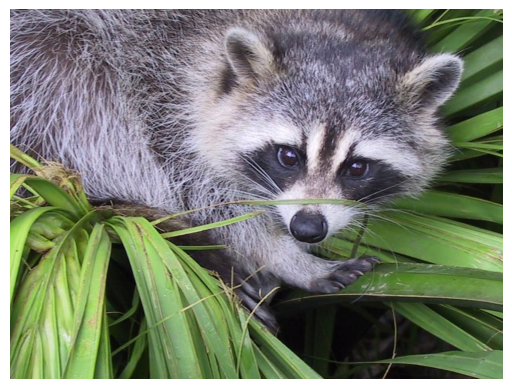

In [466]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [467]:
high_contrast = image*1.5
high_contrast[high_contrast>255] = 255
high_contrast = high_contrast.astype(np.uint8)

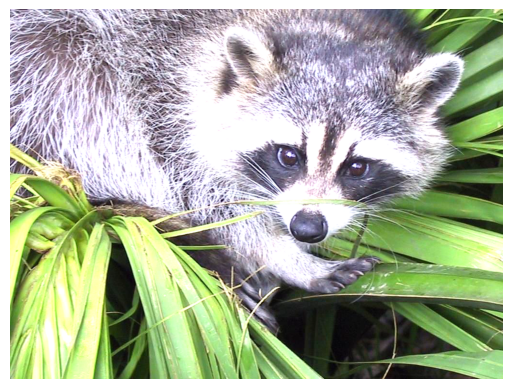

In [468]:
plt.imshow(high_contrast)
plt.axis('off')
plt.show()

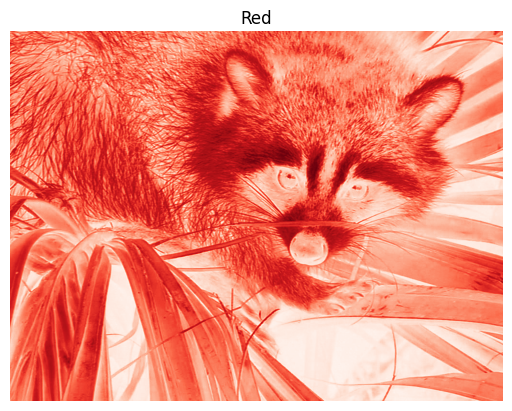

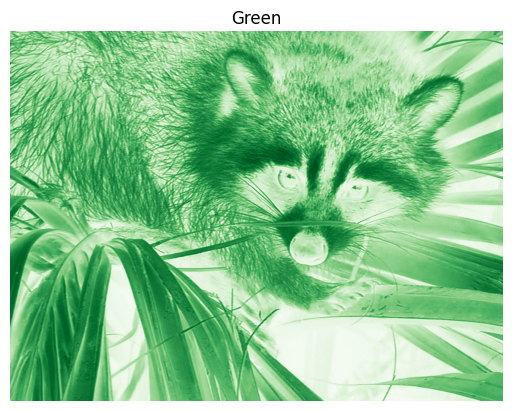

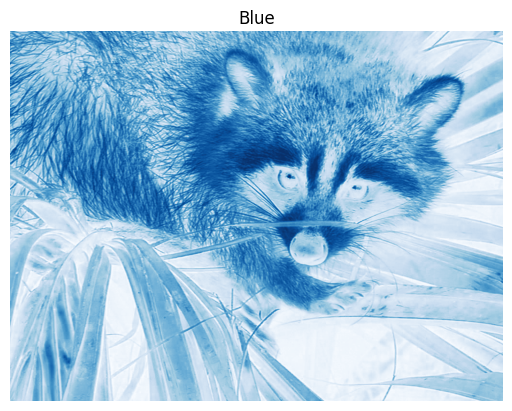

In [469]:
r, g, b = (image[:,:,0], image[:,:,1], image[:,:,2])

plt.imshow(r, cmap='Reds', vmin=0, vmax=255)
plt.axis('off')
plt.title('Red')
plt.show()
plt.imshow(g, cmap='Greens', vmin=0, vmax=255)
plt.axis('off')
plt.title('Green')
plt.show()
plt.imshow(b, cmap='Blues', vmin=0, vmax=255)
plt.axis('off')
plt.title('Blue')
plt.show()

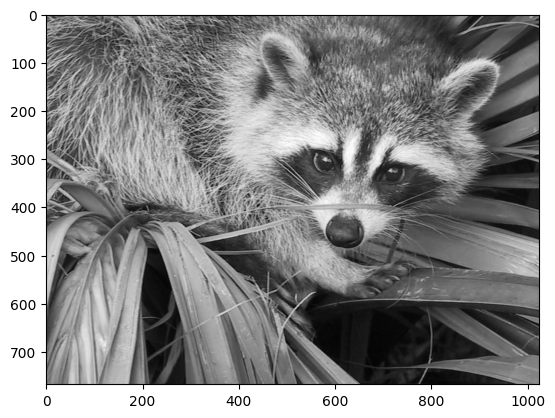

In [470]:
bw_image = np.dot(image[...,:3], [0.299, 0.587, 0.144])
plt.imshow(bw_image)
plt.show()

(-0.5, 1023.5, 767.5, -0.5)

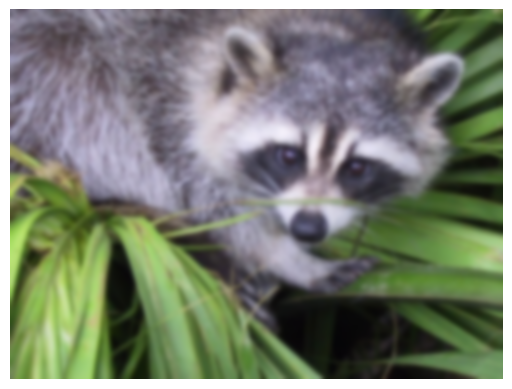

In [471]:
blured_image = ndimage.gaussian_filter(image, sigma=(5, 5, 0))
plt.imshow(blured_image)
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


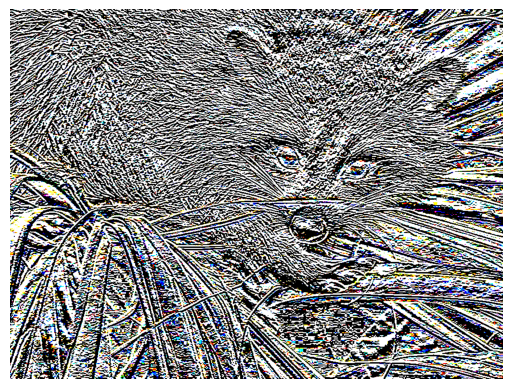

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


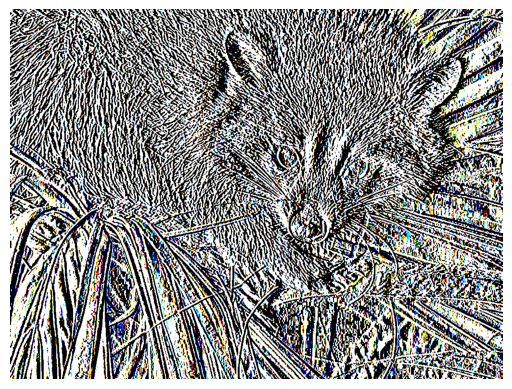

In [472]:
image = image.astype(float)
sobel_h = ndimage.sobel(image, 0)
sobel_v = ndimage.sobel(image, 1)
plt.imshow(sobel_h)
plt.axis('off')
plt.show()
plt.imshow(sobel_v)
plt.axis('off')
plt.show()